In [110]:
import pandas as pd
import numpy as np
from scipy.special import gamma as gamma_func
from math import log
from scipy.optimize import minimize

from matplotlib import pyplot as plt

In [15]:
samples = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/campestre/20m/FC_20170112_20m_patches.csv', sep=',')

In [16]:
dprvi_samples = samples['dprvi_patch_0'].values

In [17]:
def g0_estimator_moments(samples, L):

    # This function derives the parameters alpha and gamma from a G0 distribution by the moments method
    # This method assumes the Number of Looks (L) as known (for Sentinel-1: L = 4)

    m1 = np.mean(samples)
    m2 = np.mean(samples**2)

    m212 = m2/(m1**2)

    a = -2-(L+1)/(L*m212)
    g  = m1*(2+(L+1)/(L*m212))

    return round(a, 6), round(g, 6)

In [18]:
alpha0, gamma0 = g0_estimator_moments(dprvi_samples,  L=4)
print(f'a = {alpha0}, g = {gamma0}')

a = -3.213836, g = 1.98798


In [112]:
def loglikelihood_estimator(p_alpha, p_gamma):

    # This function derives the parameters alpha and gamma from a G0 distribution by the maximum likelihhod method
    # The input for this function is the alpha and gamma estimated previously by the moments method
    # This method assumes the Number of Looks (L) as known (for Sentinel-1: L = 4)
    # Samples is an array containing the pixels values of a given region in the SAR image

    #p_alpha = chute_inicial[0]
    #p_gamma = chute_inicial[1]

    p_samples = dprvi_samples
    n = len(samples) # Number of samples

    last_term = sum(np.log(p_gamma + p_samples * 4))

    return n * (gamma_func(4 - p_alpha) - p_alpha * np.log(p_gamma) - gamma_func(-p_alpha)) + (p_alpha-4) * last_term

C:\Users\jales\AppData\Local\Temp\ipykernel_3916\1382506966.py:16: RuntimeWarning: divide by zero encountered in log
  return n * (gamma_func(4 - p_alpha) - p_alpha * np.log(p_gamma) - gamma_func(-p_alpha)) + (p_alpha-4) * last_term


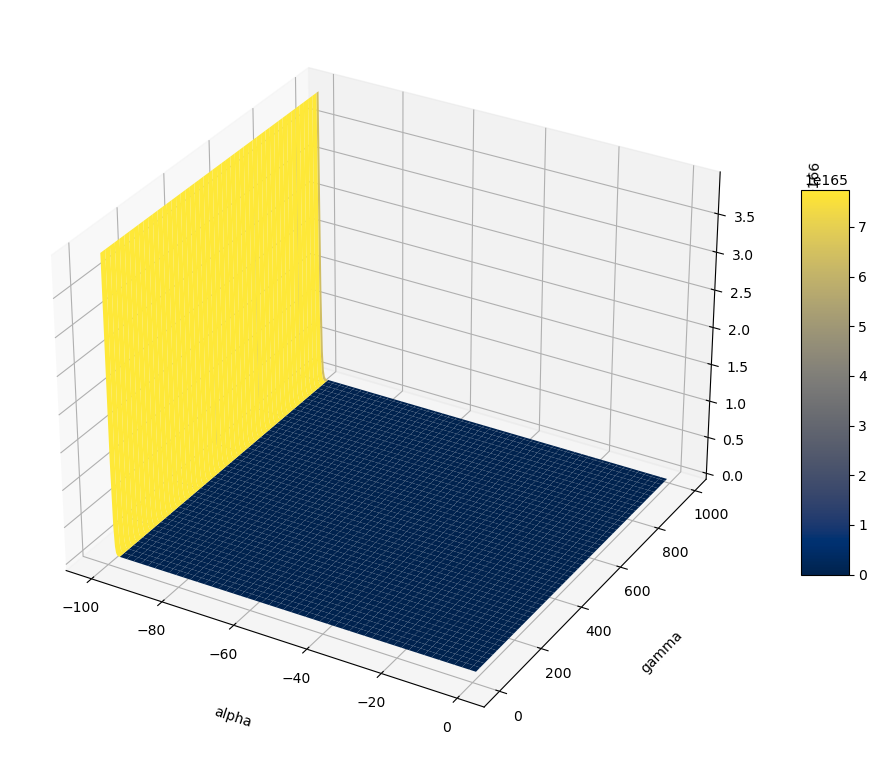

In [126]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

alpha = np.arange(-100, 0, 0.25) 
gamma = np.arange(0, 1000, 10)

X, Y = np.meshgrid(alpha, gamma)

z = loglikelihood_estimator(X, Y)

surf = ax.plot_surface(X, Y, z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('alpha', labelpad=20)
ax.set_ylabel('gamma', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()